In [50]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Part 1

### Implementing Fisher-Wright for infinite population

In [51]:
# Define the differential equation
def fisher_wright_infinite(p, t, s, n, m):
    dpdt = (p * (s - n - m - n * s) + m - s * p**2) / (1 + s * p)
    return dpdt

### Testing implementation

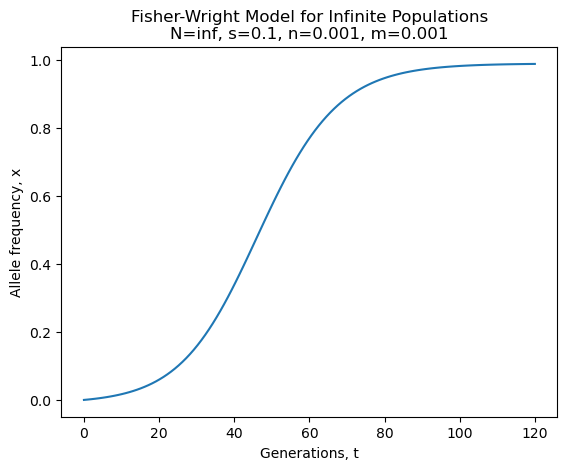

In [52]:
# Parameters
selective_advantage = 0.1
normalisation_prob = 0.001
mutation_prob = 0.001
population_size = 'inf'

# Generations
t = np.linspace(0, 120, 120)

# Initial condition (no mutants)
p0 = 0

p = odeint(fisher_wright_infinite, p0, t,args=(selective_advantage, normalisation_prob, mutation_prob))

# Plot the results
plt.plot(t, p)
plt.xlabel('Generations, t')
plt.ylabel('Allele frequency, x')
plt.title('Fisher-Wright Model for Infinite Populations\nN={}, s={}, n={}, m={}'.format(population_size, selective_advantage, normalisation_prob, mutation_prob))
plt.show()

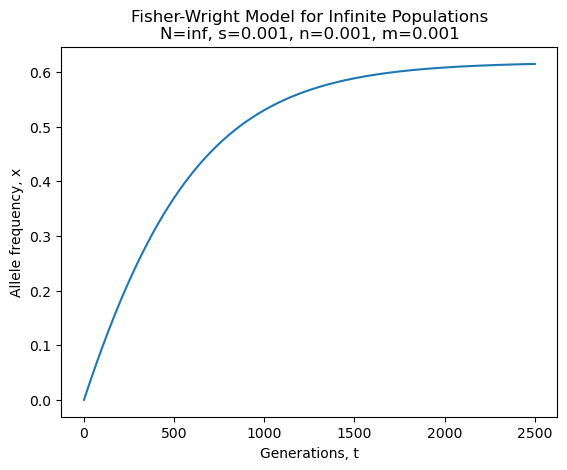

In [53]:
# Parameters
selective_advantage = 0.001
normalisation_prob = 0.001
mutation_prob = 0.001
population_size = 'inf'

# Generations
t = np.linspace(0, 2500, 2500)

# Initial condition (no mutants)
p0 = 0

p = odeint(fisher_wright_infinite, p0, t, args=(selective_advantage, normalisation_prob, mutation_prob))

# Plot the results
plt.plot(t, p)
plt.xlabel('Generations, t')
plt.ylabel('Allele frequency, x')
plt.title('Fisher-Wright Model for Infinite Populations\nN={}, s={}, n={}, m={}'.format(population_size, selective_advantage, normalisation_prob, mutation_prob))
plt.show()

### Implementing Fisher-Wright for finite population

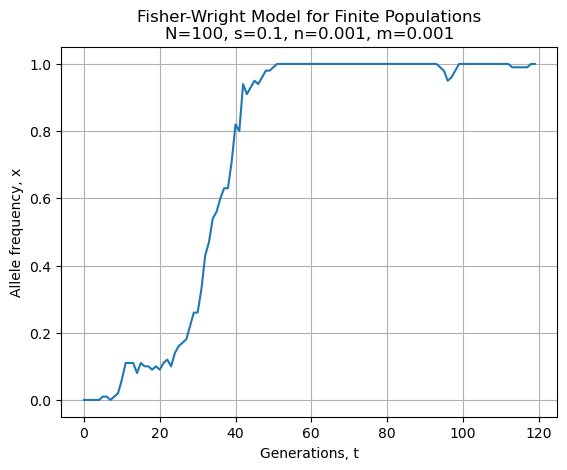

In [54]:
def fisher_wright_finite(N, x, s, m, n, T):
    mut_arr = np.zeros(T)
    
    for t in range(T):
        psm = ((1 - n) * (1 + s) * x + m * (N - x)) / (N + s * x)
        x = np.random.binomial(N, psm)
        mut_arr[t] = x / N
    
    return mut_arr

# Parameters
population_size = 100
mutants = 0
selective_advantage = 0.1
mutation_prob = 0.001
normalisation_prob = 0.001
steps = 120

allele_frequency = fisher_wright_finite(population_size, mutants, selective_advantage, mutation_prob, normalisation_prob, steps)

# Plot the results
plt.plot(range(steps), allele_frequency)
plt.xlabel('Generations, t')
plt.ylabel('Allele frequency, x')
plt.title('Fisher-Wright Model for Finite Populations\nN={}, s={}, n={}, m={}'.format(population_size, selective_advantage, normalisation_prob, mutation_prob))
plt.grid(True)
plt.show()

Comments:
1. Each run of the model produces different trajectories for allele frequencies, especially fronounced in our small population.
2. Fluctuations in allele frequency caused by random sampling.
3. There is a general trend to converge to total domination by the mutants in the population.

### Running model with averaged results

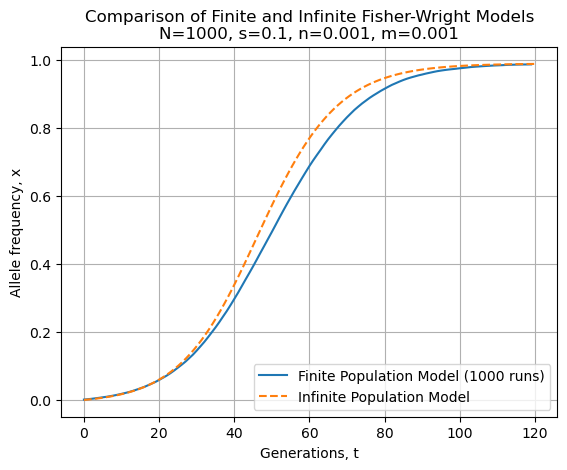

In [55]:
def run_and_average(k, population_size, mutants, selective_advantage, mutation_prob, normalisation_prob, steps):
    avg_allele_frequency = np.zeros(steps)
    
    for i in range(k):
        allele_frequency = fisher_wright_finite(population_size, mutants, selective_advantage, mutation_prob, normalisation_prob, steps)
        avg_allele_frequency += allele_frequency
    
    avg_allele_frequency /= k
    return avg_allele_frequency

# Parameters
population_size = 1000
mutants = 0
selective_advantage = 0.1
mutation_prob = 0.001
normalisation_prob = 0.001
steps = 120
k = 1000  # Number of times to run
t = np.linspace(0, steps, steps) # Generations for infinite model
p0 = 0 # Initial condition (no mutants) for infinite model

avg_allele_frequency_finite = run_and_average(k, population_size, mutants, selective_advantage, mutation_prob, normalisation_prob, steps)

# Plot the results
plt.plot(range(steps), avg_allele_frequency_finite, label='Finite Population Model ({} runs)'.format(k))
plt.xlabel('Generations, t')
plt.ylabel('Allele frequency, x')
plt.title('Comparison of Finite and Infinite Fisher-Wright Models\nN={}, s={}, n={}, m={}'.format(population_size, selective_advantage, normalisation_prob, mutation_prob))
plt.grid(True)

p = odeint(fisher_wright_infinite, p0, t, args=(selective_advantage, normalisation_prob, mutation_prob))

plt.plot(t, p, linestyle='--', label='Infinite Population Model')

plt.legend()
plt.show()

Comments: Averaging over more runs makes the finite model get closer to the infinite model. This seems to happen because the impact of randomness is reduced in the finite model over multiple runs, converging to the expected value in the infite population model.

### Plotting graphs

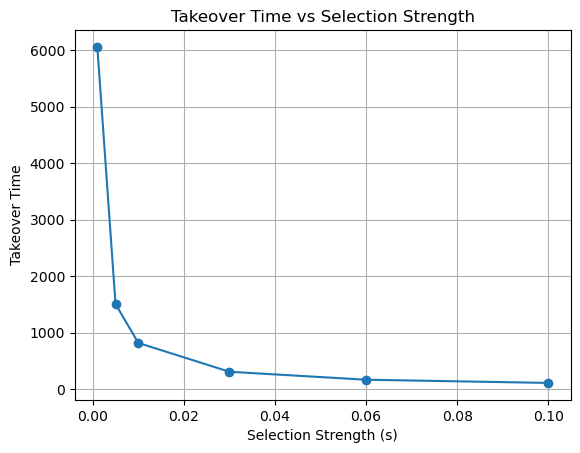

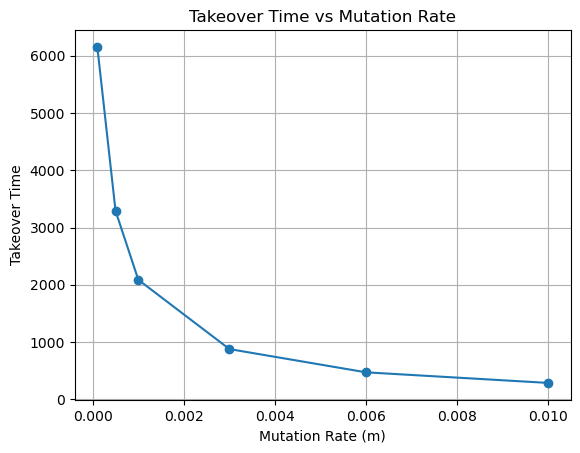

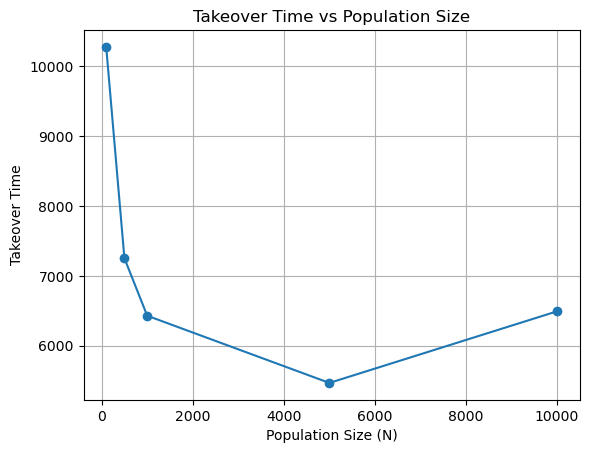

In [56]:
def fisher_wright_finite_takeover(N, s, m, n, runs):
    takeover_times = []
    mutant_proportions = []
    
    for _ in range(runs):
        x = 0  # Initial number of mutants
        t = 0  # Time
        while x / N <= 0.95:  # Takeover condition
            psm = ((1 - n) * (1 + s) * x + m * (N - x)) / (N + s * x)
            x = np.random.binomial(N, psm)
            t += 1
        
        takeover_times.append(t)
        mutant_proportions.append(x / N)

    avg_takeover_time = np.mean(takeover_times)
    avg_mutant_proportion = np.mean(mutant_proportions)
    
    return avg_takeover_time, avg_mutant_proportion

# Plot function for comparison
def plot_comparison(x_values, y_values, xlabel, ylabel, title):
    plt.plot(x_values, y_values, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Parameters
N = 10000
s_values = [0.001, 0.005, 0.01, 0.03, 0.06, 0.1]
m_values = [0.0001, 0.0005, 0.001, 0.003, 0.006, 0.01]
population_size_values = [100, 500, 1000, 5000, 10000]
n = 0.0001
runs = 100  # Number of runs

# Plotting how the takeover time depends on selection strengths
takeover_times_selection = []
for s in s_values:
    avg_takeover_time, _ = fisher_wright_finite_takeover(N, s, n, n, runs)
    takeover_times_selection.append(avg_takeover_time)
plot_comparison(s_values, takeover_times_selection, 'Selection Strength (s)', 'Takeover Time', 'Takeover Time vs Selection Strength')

# Plotting how the takeover time depends on mutation rates
takeover_times_mutation = []
for m in m_values:
    avg_takeover_time, _ = fisher_wright_finite_takeover(N, s_values[0], m, n, runs)
    takeover_times_mutation.append(avg_takeover_time)
plot_comparison(m_values, takeover_times_mutation, 'Mutation Rate (m)', 'Takeover Time', 'Takeover Time vs Mutation Rate')

# Plotting how the takeover time depends on population size
takeover_times_population_size = []
for N in population_size_values:
    avg_takeover_time, _ = fisher_wright_finite_takeover(N, s_values[0], n, n, runs)
    takeover_times_population_size.append(avg_takeover_time)
plot_comparison(population_size_values, takeover_times_population_size, 'Population Size (N)', 'Takeover Time', 'Takeover Time vs Population Size')

Comments:
1. A selective advantage is always needed for the mutant allele to be favoured by natural selection and increase in frequency.
2. Population size influences the speed of the takeover, large populations being less influenced by the stochastic nature of the model.
3. Mutation rate must occur frequently enough to introduce the mutation. If it's too low, it may take a long time for takeover.
- Overall, a combination of these conditions will determine the success of the mutant allele in taking over the population.

## Part 2

### Computing transition matrix for Markov model

In [67]:
from scipy.special import comb

def compute_transition_matrix(N, s, n, m):
    W = np.zeros((N+1, N+1))
    for x in range(N+1):
        # Calculate mutation rate
        p = ((x/N) * (1 - m) + (1 - x/N) * n) * (1 + s) / (1 + s * x/N)
        for y in range(N+1):
            W[y, x] = comb(N, y) * (p**y) * ((1-p)**(N-y))
    return W

# Parameters
population_size = 1000
selective_advantage = 0.01 
mutation_prob = normalisation_prob = 0.001

W = compute_transition_matrix(population_size, selective_advantage, mutation_prob, normalisation_prob)

### Check all columns sum to 1

In [62]:
def check_transition_matrix(W):
    for col in range(W.shape[1]):
        column_sum = np.sum(W[:, col])
        if not np.isclose(column_sum, 1):
            return False
    return True

result = check_transition_matrix(W)
print("All columns sum to 1:", result)

All columns sum to 1: True


### Generating Markov distribution for each time step

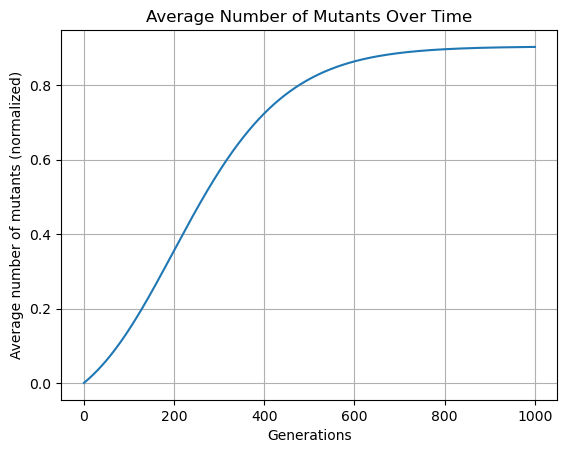

In [68]:
# Initial distribution: All individuals are non-mutants
initial_distribution = np.zeros(population_size+1)
initial_distribution[0] = 1

# Generating the Markov distribution
generations = 1000
distributions = np.zeros((population_size+1, generations+1))
distributions[:, 0] = initial_distribution
for t in range(1, generations+1):
    distributions[:, t] = W.dot(distributions[:, t-1])

# Calculate the average of the distribution
averages = np.zeros(generations+1)
for t in range(generations+1):
    averages[t] = np.sum(distributions[:, t] * np.arange(population_size+1)) / population_size

# Plot
plt.plot(range(generations+1), averages)
plt.xlabel('Generations')
plt.ylabel('Average number of mutants (normalized)')
plt.title('Average Number of Mutants Over Time')
plt.grid(True)
plt.show()

### Plotting and comparing with Fischer-Wright

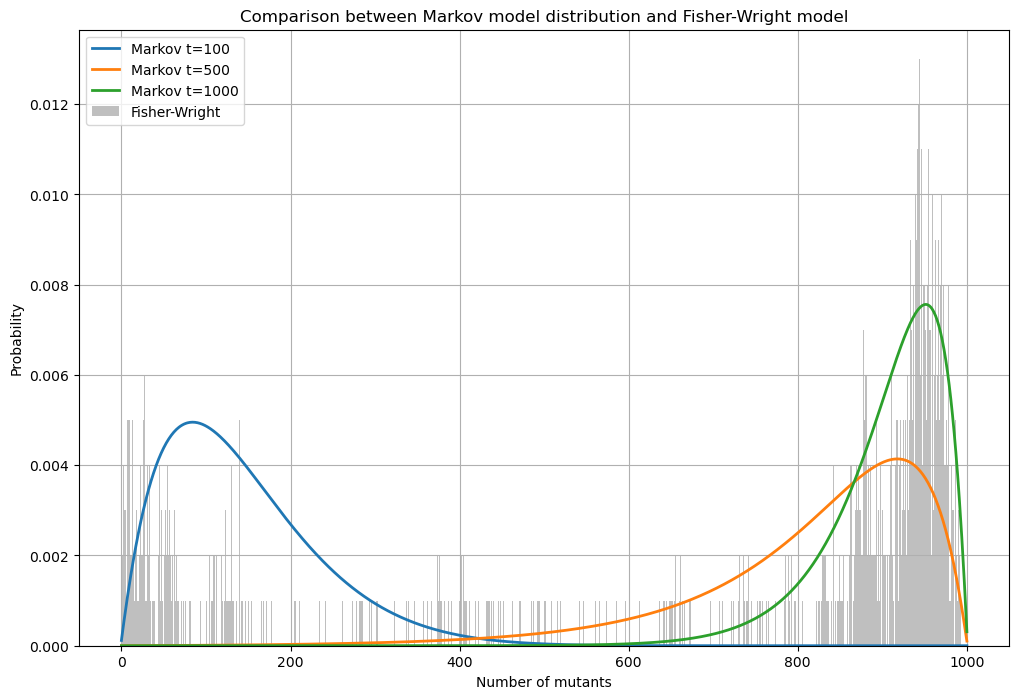

In [ ]:
def fisher_wright(N, s, m, n, T):
    x = 0
    number_of_mutants = np.zeros(T+1)
    number_of_mutants[0] = x
    for t in range(1, T+1):
        psm = ((1 - n) * (1 + s) * x + m * (N - x)) / (N + s * x)
        x = np.random.binomial(N, psm)
        number_of_mutants[t] = x
    
    return number_of_mutants

T = 1000  # Total time steps
steps_to_plot = [100, 500, 1000]

# Fisher-Wright
fw_number_of_mutants = fisher_wright(N, s, m, n, T)

plt.figure(figsize=(12, 8))

# Markov distribution plots
for step in steps_to_plot:
    plt.plot(range(N+1), distributions[:, step], label=f'Markov t={step}', linewidth=2)

# Fisher-Wright histogram
counts, bins, _ = plt.hist(fw_number_of_mutants, bins=N+1, range=(0, N), density=True, alpha=0.5, color='gray', label='Fisher-Wright')

plt.xlabel('Number of mutants')
plt.ylabel('Probability')
plt.title('Comparison between Markov model distribution and Fisher-Wright model')
plt.legend()
plt.grid(True)
plt.show()

## Part 3

### Implementing Fischer-Wright using genome of L binary values

In [ ]:
def initialize_population(N, L):
    return np.zeros((N, L), dtype=int)

def select_individuals_to_reproduce(population, s):
    fitness = np.sum(population, axis=1) * (1 + s)
    sum_fitness = np.sum(fitness)
    if sum_fitness == 0:
        return np.random.choice(len(population), size=N)
    else:
        probabilities = fitness / sum_fitness
        return np.random.choice(len(population), size=N, p=probabilities)

def mutate_genomes(offspring, m, n):
    mutations = np.random.rand(*offspring.shape)
    offspring[mutations < m] = np.bitwise_xor(offspring[mutations < m], 1)  # Flip from 0 to 1
    offspring[mutations > (1 - n)] = np.bitwise_xor(offspring[mutations > (1 - n)], 1)  # Flip from 1 to 0
    return offspring

### Recording the average number of mutations per site

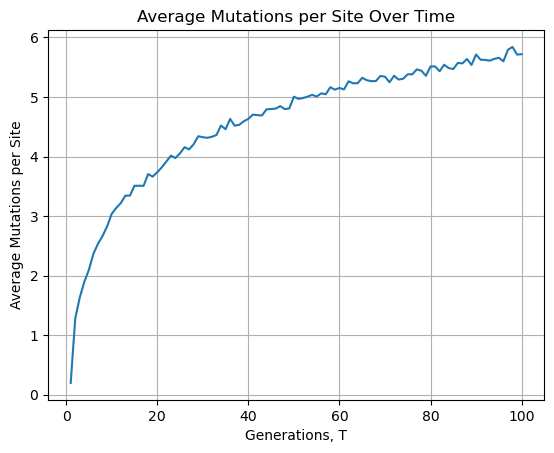

In [ ]:
# Parameters
population_size = 1000
genome_size = 100 
selective_advantage = 0.1 
n = m = 0.001
generations = 100

# Initialize population
population = initialize_population(population_size, genome_size)

average_mutations_per_site = []
for t in range(generations):
    # Select individuals to reproduce
    selected_indices = select_individuals_to_reproduce(population, selective_advantage)
    offspring = population[selected_indices]

    # Mutate genomes of offspring
    offspring = mutate_genomes(offspring, m, n)

    # Update population with offspring
    population = np.vstack((population, offspring))

    average_mutations_per_site.append(np.mean(np.sum(offspring, axis=1)))

# Plot average number of mutations per site over time
import matplotlib.pyplot as plt
plt.plot(range(1, generations + 1), average_mutations_per_site)
plt.xlabel('Generations, T')
plt.ylabel('Average Mutations per Site')
plt.title('Average Mutations per Site Over Time')
plt.grid(True)
plt.show()

### Including crossover

In [ ]:
def select_parents_for_reproduction(population, s):
    fitness = np.sum(population, axis=1) * (1 + s)
    sum_fitness = np.sum(fitness)
    if sum_fitness == 0:
        return np.random.choice(len(population), size=2)
    else:
        probabilities = fitness / sum_fitness
        return np.random.choice(len(population), size=2, p=probabilities)

def uniform_crossover_for_child(parent1, parent2):
    mask = np.random.randint(2, size=len(parent1))
    child = np.where(mask, parent1, parent2)
    return child

def mutate_genomes(offspring, m, n):
    mutations = np.random.rand(*offspring.shape)
    offspring[mutations < m] = np.bitwise_xor(offspring[mutations < m], 1)
    offspring[mutations > (1 - n)] = np.bitwise_xor(offspring[mutations > (1 - n)], 1)
    return offspring

### Comparing sexual and asexual models

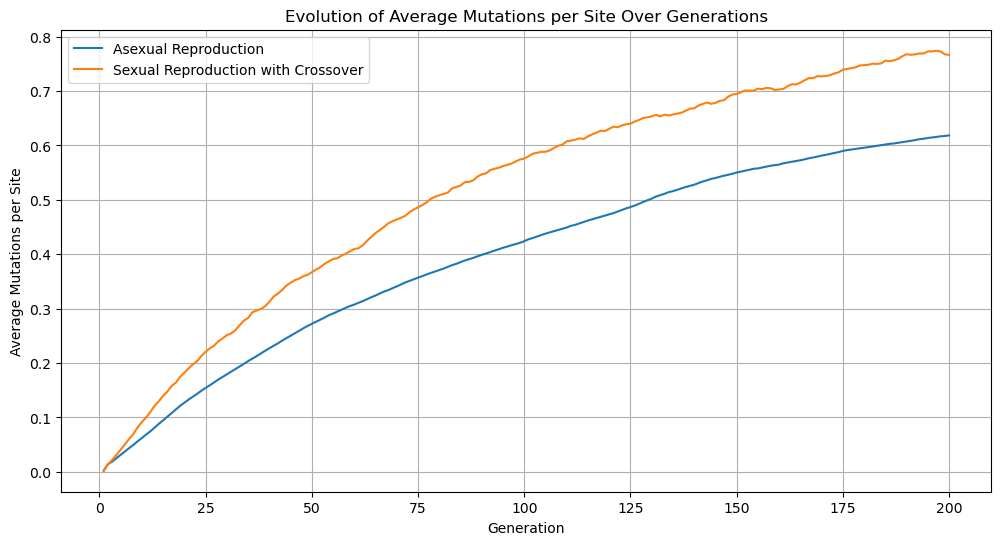

In [70]:
# Parameters
population_size = 1000
genome_size = 100
selective_advantage = 0.1 
m = n = 0.001
generations = 200

average_mutations_per_site_asexual = []
average_mutations_per_site_sexual = []

# Initialize population
population = initialize_population(population_size, genome_size)

# Asexual reproduction
for t in range(generations):
    selected_indices = select_individuals_to_reproduce(population, selective_advantage)
    offspring = population[selected_indices]
    offspring = mutate_genomes(offspring, m, n)
    population = offspring
    average_mutations_per_site_asexual.append(np.mean(np.sum(offspring, axis=1) / genome_size))

# Re-initialize population for sexual reproduction
population = initialize_population(population_size, genome_size)

# Sexual reproduction with crossover
for t in range(generations):
    new_generation = np.zeros_like(population)
    for i in range(0, population_size, 2):  # Iterate in pairs
        parent_indices = select_parents_for_reproduction(population, selective_advantage)
        parent1, parent2 = population[parent_indices[0]], population[parent_indices[1]]
        child = uniform_crossover_for_child(parent1, parent2)
        child = mutate_genomes(child[None, :], m, n)[0]  # Ensure correct shape for mutation
        new_generation[i] = child
        if i+1 < population_size:  # For odd-sized populations
            new_generation[i+1] = child  # Assign same child to next slot
    population = new_generation
    average_mutations_per_site_sexual.append(np.mean(np.sum(new_generation, axis=1)/genome_size))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, generations + 1), average_mutations_per_site_asexual, label='Asexual Reproduction')
plt.plot(range(1, generations + 1), average_mutations_per_site_sexual, label='Sexual Reproduction with Crossover')
plt.xlabel('Generation')
plt.ylabel('Average Mutations per Site')
plt.title('Evolution of Average Mutations per Site Over Generations')
plt.legend()
plt.grid(True)
plt.show()

### Exploring what parameter values make the model deviate from the Markov model

#### Exploring the effects of higher selective advantage and mutation rate in asexual reproduction

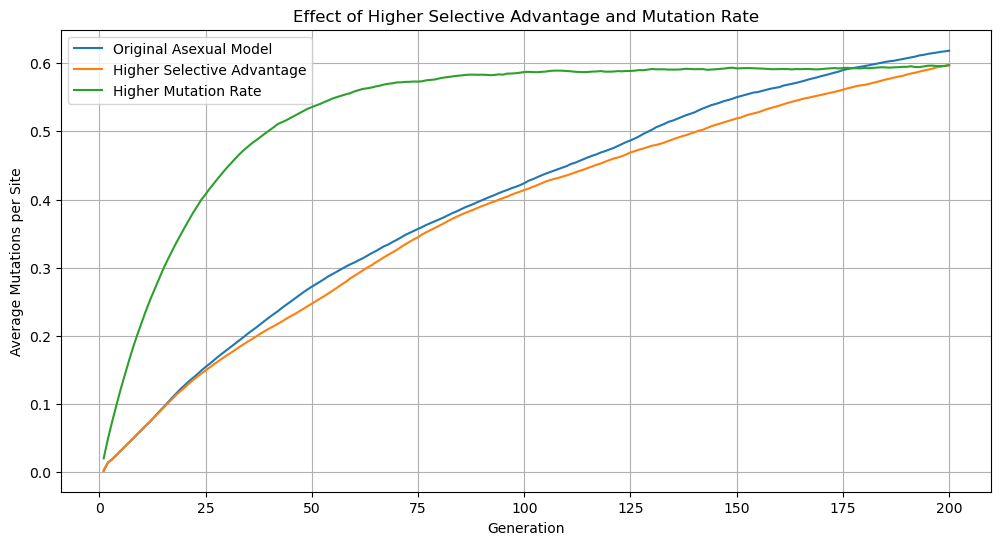

In [71]:
# Higher selective advantage
selective_advantage_high = 0.3  # Increased selective advantage
population_high_s = initialize_population(population_size, genome_size)
average_mutations_per_site_high_s = []

for t in range(generations):
    selected_indices = select_individuals_to_reproduce(population_high_s, selective_advantage_high)
    offspring_high_s = population_high_s[selected_indices]
    offspring_high_s = mutate_genomes(offspring_high_s, m, n)
    population_high_s = offspring_high_s
    average_mutations_per_site_high_s.append(np.mean(np.sum(offspring_high_s, axis=1) / genome_size))

# Higher mutation rate
m_high = n_high = 0.01  # Increased mutation rate
population_high_m = initialize_population(population_size, genome_size)
average_mutations_per_site_high_m = []

for t in range(generations):
    selected_indices = select_individuals_to_reproduce(population_high_m, selective_advantage)
    offspring_high_m = population_high_m[selected_indices]
    offspring_high_m = mutate_genomes(offspring_high_m, m_high, n_high)
    population_high_m = offspring_high_m
    average_mutations_per_site_high_m.append(np.mean(np.sum(offspring_high_m, axis=1) / genome_size))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, generations + 1), average_mutations_per_site_asexual, label='Original Asexual Model')
plt.plot(range(1, generations + 1), average_mutations_per_site_high_s, label='Higher Selective Advantage')
plt.plot(range(1, generations + 1), average_mutations_per_site_high_m, label='Higher Mutation Rate')
plt.xlabel('Generation')
plt.ylabel('Average Mutations per Site')
plt.title('Effect of Higher Selective Advantage and Mutation Rate')
plt.legend()
plt.grid(True)
plt.show()

#### Exploring the effects of higher selective advantage and mutation rate in sexual reproduction

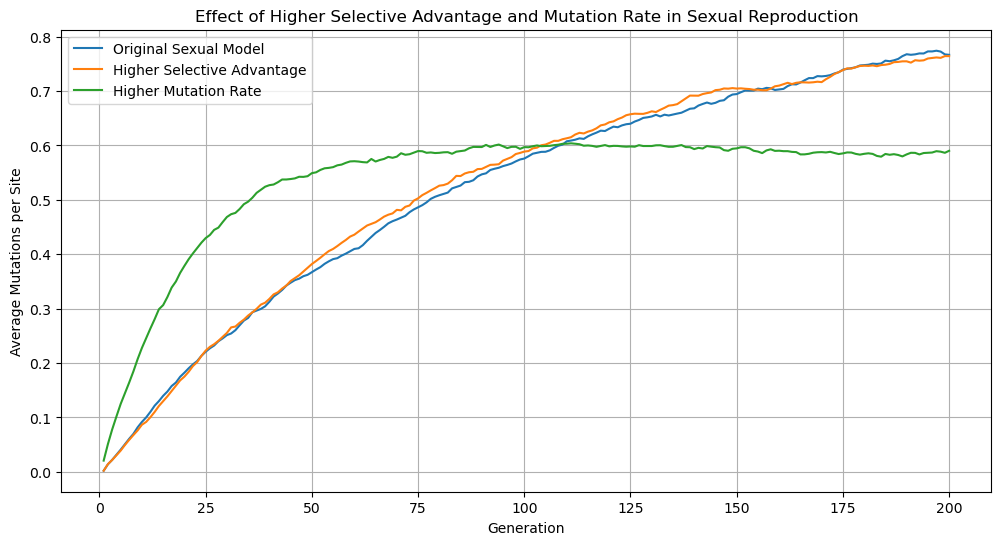

In [72]:

# Initialize population
population_high_s_sexual = initialize_population(population_size, genome_size)
average_mutations_per_site_high_s_sexual = []

# Higher selective advantage
for t in range(generations):
    new_generation_high_s = np.zeros_like(population_high_s_sexual)
    for i in range(0, population_size, 2):
        parent_indices = select_parents_for_reproduction(population_high_s_sexual, selective_advantage_high)
        parent1, parent2 = population_high_s_sexual[parent_indices[0]], population_high_s_sexual[parent_indices[1]]
        child = uniform_crossover_for_child(parent1, parent2)
        child = mutate_genomes(child[None, :], m, n)[0]
        new_generation_high_s[i] = child
        if i+1 < population_size:
            new_generation_high_s[i+1] = child
    population_high_s_sexual = new_generation_high_s
    average_mutations_per_site_high_s_sexual.append(np.mean(np.sum(new_generation_high_s, axis=1)/genome_size))

# Re-initialize population
population_high_m_sexual = initialize_population(population_size, genome_size)
average_mutations_per_site_high_m_sexual = []

# Higher mutation rates
for t in range(generations):
    new_generation_high_m = np.zeros_like(population_high_m_sexual)
    for i in range(0, population_size, 2):
        parent_indices = select_parents_for_reproduction(population_high_m_sexual, selective_advantage)
        parent1, parent2 = population_high_m_sexual[parent_indices[0]], population_high_m_sexual[parent_indices[1]]
        child = uniform_crossover_for_child(parent1, parent2)
        child = mutate_genomes(child[None, :], m_high, n_high)[0]
        new_generation_high_m[i] = child
        if i+1 < population_size:
            new_generation_high_m[i+1] = child
    population_high_m_sexual = new_generation_high_m
    average_mutations_per_site_high_m_sexual.append(np.mean(np.sum(new_generation_high_m, axis=1)/genome_size))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, generations + 1), average_mutations_per_site_sexual, label='Original Sexual Model')
plt.plot(range(1, generations + 1), average_mutations_per_site_high_s_sexual, label='Higher Selective Advantage')
plt.plot(range(1, generations + 1), average_mutations_per_site_high_m_sexual, label='Higher Mutation Rate')
plt.xlabel('Generation')
plt.ylabel('Average Mutations per Site')
plt.title('Effect of Higher Selective Advantage and Mutation Rate in Sexual Reproduction')
plt.legend()
plt.grid(True)
plt.show()

Conclusions:
1. For both modes of reproduction a higher selective advantage doesn't seem to benefit the fixation of mutations in the genome and frequently hinder it.
2. Higher mutation rate, however, as expected leads to more average muations per site as more genetic variability is introduced for both modes of reproduction.
3. Interestingly, the number of mutations plateus at the 0.6 average mutations per site.